# CVIT Summer Workshop 2020

Day 07 (Afternoon Session): Introduction to Unsupervised Learning (Clustering)

Instructor: Kartik Gupta, Honours Student, CVIT

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances

import seaborn as sns
sns.set()
sns.set_style("dark")

## Visual Plot of 2-D Cluster Data

In [25]:
def plot_clusters(points, cluster_labels, offset = 0.01, show_annotation=True):
    cluster_labels = np.array(cluster_labels)
    unique_clusters = np.unique(cluster_labels)
    
    if len(points.shape) == 1 or points.shape[1] == 1:
        points = np.hstack((points.ravel()[:, None], np.zeros(points.shape[0])[:, None]))
        
    cluster_labels = np.array(cluster_labels)
    points = np.array(points)
    
    for cluster in unique_clusters:
        if (cluster_labels == cluster).any():
            plt.scatter(points[cluster_labels == cluster, 0], points[cluster_labels == cluster, 1], label = cluster_labels)
            
    if show_annotation:
        for i in range(points.shape[0]):
            plt.annotate(i, (points[i, 0] + offset, points[i, 1] + offset))
            
    # plt.legend() 

In [3]:
np.random.seed(2)
points = np.vstack((np.random.normal(0, 0.5, size = (4, 2)), np.random.normal(3, 0.5, size = (4, 2))))
points = np.vstack((points, np.array([[1.5, 1.5]])))
points = np.vstack((points, np.array([[1.25, 1.25]])))

<function matplotlib.pyplot.show(*args, **kw)>

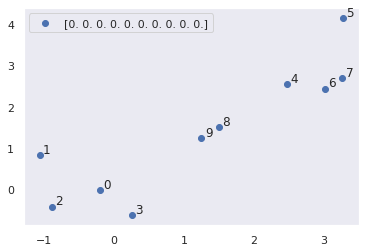

In [4]:
cluster_labels = np.zeros((10)).tolist()
offset = 0.05

plot_clusters(points, cluster_labels, offset)
plt.show

## Interactive Clustering of Data Points

Cluster the data into K clusters. In this example, K = 3 seems to be the best choice.

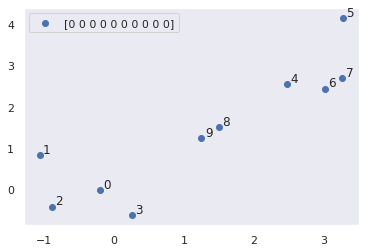

q


In [5]:
cluster_labels = np.zeros((10), dtype = np.int32).tolist()
unique_clusters = np.unique(cluster_labels).tolist()

offset = 0.05

plot_clusters(points, cluster_labels, offset)
plt.show()

while(True):
    ip = input()
    if ip == 'q':
        break
        
    idx, label = [i.strip() for i in ip.split('-')]
    idx = int(idx)
    
    cluster_labels[idx] = label
    if label not in unique_clusters:
        unique_clusters.append(label)
        
    plot_clusters(points, cluster_labels, offset)
    plt.show()

## How to Qauntify 'Relatedness'?

In [6]:
def heatmap(grid, xlabels, ylabels, xrot = 90):
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0, grid.shape[1], step = 1), xlabels, rotation = xrot)
    plt.yticks(np.arange(0, grid.shape[0], step = 1), ylabels)

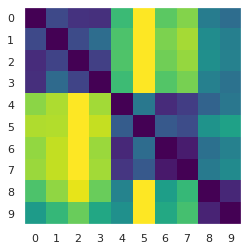

In [11]:
grid = euclidean_distances(points, points)
grid = (grid - grid.min(axis = 1)[:, None])/(grid.max(axis=1)[:, None] - grid.min(axis=1)[:, None])

xlabels = np.arange(0, points.shape[0])
ylabels = np.arange(0, points.shape[0])

heatmap(grid, xlabels, ylabels, xrot = 0)

In [12]:
k = 3
means = np.random.uniform(0, 3, size = (k, 2))

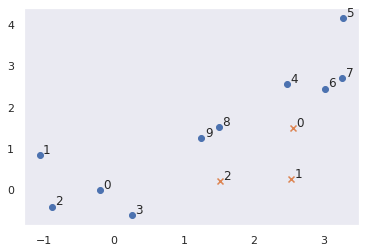

In [14]:
offset = 0.05

plt.scatter(points[:, 0], points[:, 1], marker = 'o')

for i in range(points.shape[0]):
    plt.annotate(i, (points[i, 0] + offset, points[i, 1] + offset))
plt.scatter(means[:, 0], means[:, 1], marker = 'x')

for i in range(means.shape[0]):
    plt.annotate(i, (means[i, 0] + offset, means[i, 1] + offset))

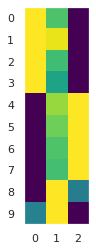

In [15]:
grid = euclidean_distances(points, means)
grid = (grid - grid.min(axis=1)[:, None])/(grid.max(axis=1)[:, None] - grid.min(axis=1)[:, None])

xlabels = np.arange(0, means.shape[0])
ylabels = np.arange(0, points.shape[0])

heatmap(grid, xlabels, ylabels, xrot = 0)

## Kmeans Clustering

#### Aim
Get a good placement of the K center points so that meaningful clustering happens.

#### What is a 'good' placement for the three centers?
A placement that minimizes the average distance of the points in a cluster from the cluster center.

#### When is a point P in the cluster i?
When Ci - the ith center point is the closest center point to P, P is said to be in cluster i.

### Algorithm

1. Initialization Step: Initalize the K cluster centers.
2. Repeat until no change in any cluster.
    - A. Assignment Step: For each point P, find the closest center point Ci and set the cluster for point P as i.
    - Cluster Point Center Recalculation Step: For each cluster i, find the mean (Mi) of all the points in the ith cluster, and update Ci = M.

#### Why K-"Means"?

At the end of the above algorithm, the final cluster centers (Ci-s) will be equal to the mean of their clusters. Hence, we end up with K-"Means".

### Initialization Step

In [1]:
def initialize(points, K):
    idxs = np.random.choice(points.shape[0], size=(K), replace=False)
    cluster_centers = []
    
    for idx in idxs:
        cluster_centers.append(points[idx, :])
        
    cluster_centers = np.array(cluster_centers)
    return cluster_centers

### Assignment Step

In [2]:
def assign(points, cluster_centers):
    distances = euclidean_distances(points, cluster_centers)
    cluster_labels = np.argmin(distances, axis=1)
    
    return cluster_labels

### Cluster Point Center Recalculation Step

In [3]:
def recalculate_cluster_centers(points, cluster_labels, K):
    cluster_centers = np.zeros((K, 2))
    
    for label in range(K):
        cluster_centers[label, :] = points[cluster_labels==label, :].mean(axis=0)
        
    return cluster_centers

### K-means Algorithm Definition

In [13]:
def Kmeans(points, K):
    cluster_labels = np.zeros((points.shape[0]))
    
    # initialize K cluster_centers
    cluster_centers = initialize(points, K)
    initial_centers = cluster_centers.copy()
    old_cluster_centers = np.zeros(cluster_centers.shape)
    
    while not(old_cluster_centers == cluster_centers).all():
        old_cluster_centers = cluster_centers.copy()
        
        # assign
        cluster_labels = assign(points, cluster_centers)
        
        # recalculate
        cluster_centers = recalculate_cluster_centers(points, cluster_labels, K)
        
    return cluster_labels, initial_centers, cluster_centers

#### Initialize Dataset

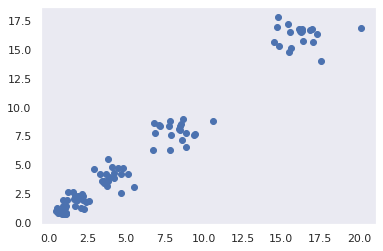

In [26]:
np.random.seed(2)

K = 5
X = []

for i in range(5):
    X.append(np.random.normal(2**i, (i + 1)/5, size = (20, 2)))
    
points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

#### Initialization Matters

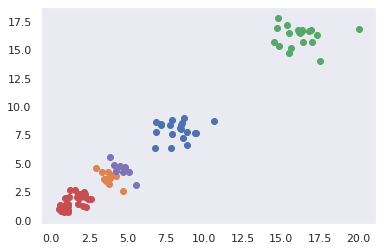

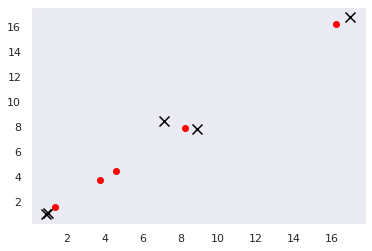

In [23]:
cluster_labels, initial_centers, final_centers = Kmeans(points, K)

plot_clusters(points, cluster_labels, show_annotation=False)
plt.show()

plt.scatter(initial_centers[:, 0], initial_centers[:, 1], marker='x', s=100, c='black')
plt.scatter(final_centers[:, 0], final_centers[:, 1], marker='o', c='red')